In [7]:
import pandas as pd
# rating_cols = ['Time', 'Drug']
df = pd.read_csv('AusAntidiabeticDrug.csv', sep=',')
df  

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [42]:
import pandas as pd
import joblib
# rating_cols = ['Year', 'Anomaly']
df = pd.read_csv('AusAntidiabeticDrug.csv', sep=',')
data = df['y']
n = len(data)
sizeTrain = (round(n*0.8))
data_train = pd.DataFrame(data[:sizeTrain])
data_test = pd.DataFrame(data[sizeTrain:])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(data_train)
joblib.dump(scaler, 'scaler.pkl')
# Mengaplikasikan MinMaxScaler pada data pengujian
test_scaled = scaler.transform(data_test)

# reshaped_data = data.reshape(-1, 1)
train = pd.DataFrame(train_scaled, columns = ['data'])
train = train['data']

test = pd.DataFrame(test_scaled, columns = ['data'])
test = test['data']
import numpy as np
from numpy import array
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  
  return array(X), array(y)
df_X, df_Y = split_sequence(train, 2)
x = pd.DataFrame(df_X)
y = pd.DataFrame(df_Y)
dataset_train = pd.concat([x, y], axis=1)
dataset_train
# dataset_train.to_excel('data-train.xlsx', index=False)
X_train = dataset_train.iloc[:, :2].values
Y_train = dataset_train.iloc[:, -1].values
test_x, test_y = split_sequence(test, 2)
x = pd.DataFrame(test_x)
y = pd.DataFrame(test_y)
dataset_test = pd.concat([x, y], axis=1)
X_test = dataset_test.iloc[:, :2].values
Y_test = dataset_test.iloc[:, -1].values
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
svr = SVR(kernel='linear') 
svr.fit(X_train, Y_train)
joblib.dump(svr, 'modelSVM.pkl')
# d = X_test[0]
# y_pred=svr.predict([d])
# print(y_pred)
def ramal(n_pred, dataset_test, tahun):
    tahun = tahun[0]
    last = dataset_test.tail(1)
    fitur = last.values
    n_fit = len(fitur[0])
    fiturs = np.zeros((n_pred, n_fit))
    tahuns = np.zeros(n_pred)
    preds = np.zeros(n_pred)
    for i in range(n_pred):
        if i == 0:
            fitur = fitur[:, 1:n_fit]
            y_pred=svr.predict(fitur)
            new_fit = np.array(fitur[0])
            new_fit = np.append(new_fit,y_pred)
        else:
            fitur = fiturs[i-1][1:n_fit]
            y_pred=svr.predict([fitur])
            new_fit = np.array(fitur)
            new_fit = np.append(new_fit,y_pred)
        preds[i] = y_pred
        fiturs[i,:] = new_fit 
        tahun += 1
        tahuns[i] = tahun
#     print(preds)
#     print(fiturs)
    return preds, tahuns.astype(int)
tahun_terakhir = df['y'].tail(1).values
pred, tahun = ramal(3,dataset_test, tahun_terakhir)
# print(pred)
# print(tahun)
reshaped_data = pred.reshape(-1, 1)
original_data = scaler.inverse_transform(reshaped_data)
# print(original_data)
df_pred = pd.DataFrame({'ds': tahun, 'Drug': pred})
# df_pred
# 
# data_train
df_pred


,ds,Drug
0,20,1.004697
1,21,0.978150
2,22,0.992942


In [41]:
# from pathlib import Path  
# filepath = Path('data-test.csv')  
# # filepath.parent.mkdir(parents=True, exist_ok=True)  
# data_test.to_csv(filepath) 

In [43]:
dataset_test.to_csv('data-test.csv', index=False)

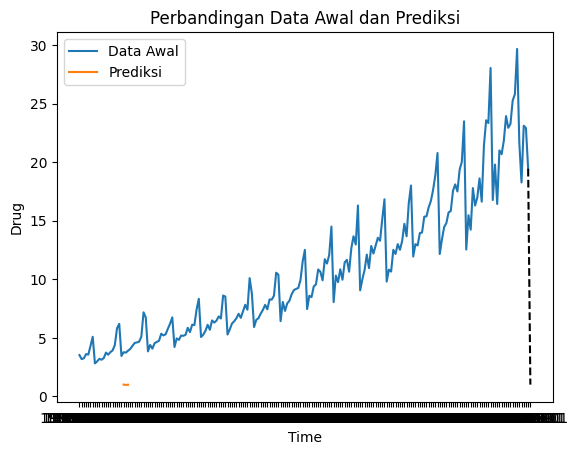

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file 'tempe.txt' ke dalam DataFrame df
df = pd.read_csv('AusAntidiabeticDrug.csv')

# DataFrame prediksi
df_pred = pd.DataFrame({'ds': tahun, 'y': pred})

# Plot data df
plt.plot(df['ds'], df['y'], label='Data Awal')

# Plot data df_pred
plt.plot(df_pred['ds'], df_pred['y'], label='Prediksi')

# Menghubungkan plot terakhir data awal dengan plot awal data prediksi
last_year = df['ds'].iloc[-1]
plt.plot([last_year, df_pred['ds'].iloc[0]], [df['y'].iloc[-1], df_pred['y'].iloc[0]], 'k--')

# Konfigurasi plot
plt.xlabel('Time')
plt.ylabel('Drug')
plt.title('Perbandingan Data Awal dan Prediksi')
plt.legend()

# Tampilkan plot
plt.show()


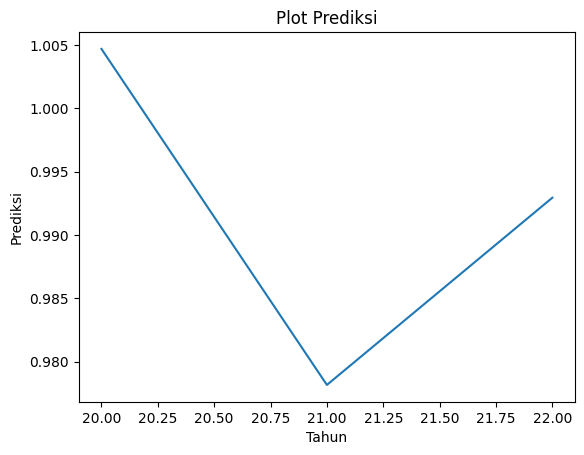

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df_pred = pd.DataFrame({'Tahun': tahun, 'Prediksi': pred})

# Plot data
plt.plot(df_pred['Tahun'], df_pred['Prediksi'])

# Konfigurasi plot
plt.xlabel('Tahun')
plt.ylabel('Prediksi')
plt.title('Plot Prediksi')

# Tampilkan plot
plt.show()


2023-06-14 22:16:11.461 
  command:

    streamlit run C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

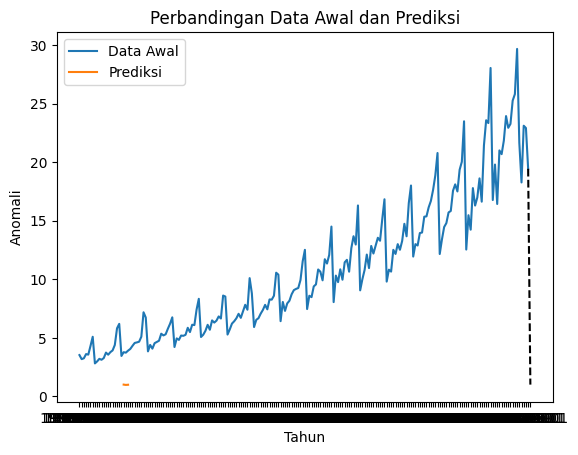

In [26]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file 'tempe.txt' ke dalam DataFrame df
df = pd.read_csv('AusAntidiabeticDrug.csv', sep=',')

# DataFrame prediksi
df_pred = pd.DataFrame({'ds': tahun, 'y': pred})

# Plot data df
fig, ax = plt.subplots()
ax.plot(df['ds'], df['y'], label='Data Awal')

# Plot data df_pred
ax.plot(df_pred['ds'], df_pred['y'], label='Prediksi')

# Menghubungkan plot terakhir data awal dengan plot awal data prediksi
last_year = df['ds'].iloc[-1]
ax.plot([last_year, df_pred['ds'].iloc[0]], [df['y'].iloc[-1], df_pred['y'].iloc[0]], 'k--')

# Konfigurasi plot
ax.set_xlabel('Tahun')
ax.set_ylabel('Anomali')
ax.set_title('Perbandingan Data Awal dan Prediksi')
ax.legend()

# Tampilkan plot
st.pyplot(fig)


In [6]:
# y_pred = np.array([0.200000])
# reshaped_data = y_pred.reshape(-1, 1)
# original_data = scaler.inverse_transform(reshaped_data)
# print(original_data)
# test_x_future, _ = split_sequence(test, 2)
# future_years = np.arange(2024, 2029)  # Tambahkan 5 tahun ke depan
# test_array = np.array(test)
# test_array = np.expand_dims(test_array, axis=1)
# future_years = np.expand_dims(future_years, axis=1)
# test_x_future = np.concatenate([test_array[:-1], future_years])
# y_pred_future = svr.predict(test_x_future)
# print("Hasil Peramalan 5 Tahun ke Depan:")
# for year, prediction in zip(future_years, y_pred_future):
#     print("Tahun:", year[0], "Prediksi:", prediction)